In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import warnings
from wordcloud import WordCloud
from collections import Counter
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [ ]:
df = pd.read_csv('netflix_titles.csv')
df.head()
# df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
print(f"Dataset shape: {df.shape}")
print(f"Number of features: {df.shape[1]}")
print(f"Number of records: {df.shape[0]}")

Dataset shape: (8807, 12)
Number of features: 12
Number of records: 8807


In [ ]:
print(f"Number of duplicated records: {df.duplicated().sum()}")

Number of duplicated records: 0


In [ ]:
print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [ ]:
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_info)

              Missing Count  Missing Percentage
show_id                   0            0.000000
type                      0            0.000000
title                     0            0.000000
director               2634           29.908028
cast                    825            9.367549
country                 831            9.435676
date_added               10            0.113546
release_year              0            0.000000
rating                    4            0.045418
duration                  3            0.034064
listed_in                 0            0.000000
description               0            0.000000


In [ ]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

show_id: 8807 unique values
type: 2 unique values
title: 8807 unique values
director: 4528 unique values
cast: 7692 unique values
country: 748 unique values
date_added: 1767 unique values
release_year: 74 unique values
rating: 17 unique values
duration: 220 unique values
listed_in: 514 unique values
description: 8775 unique values


## Feature Exploration

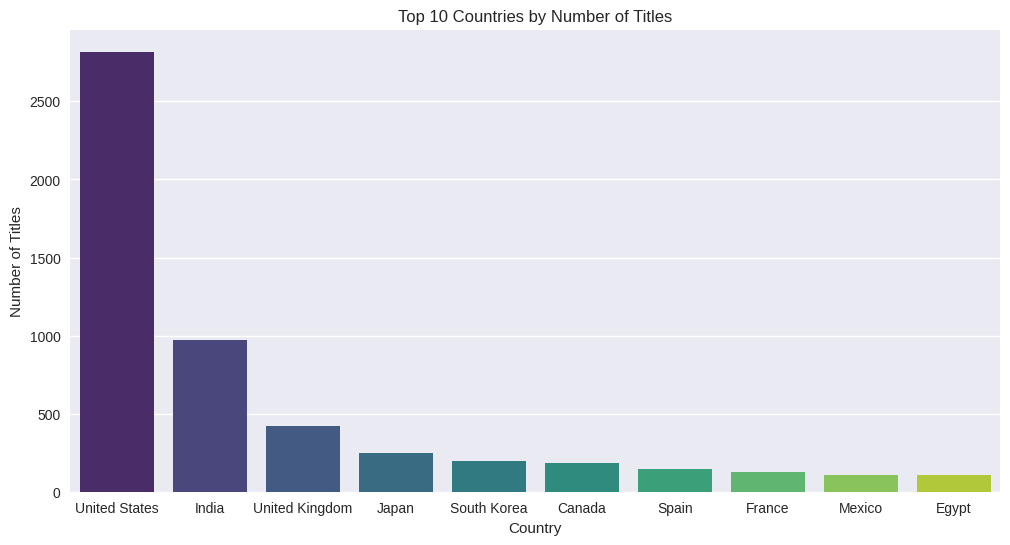

In [ ]:
#Plotting country distribution
plt.figure(figsize=(12, 6))
country_counts = df['country'].value_counts().head(10)
sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()

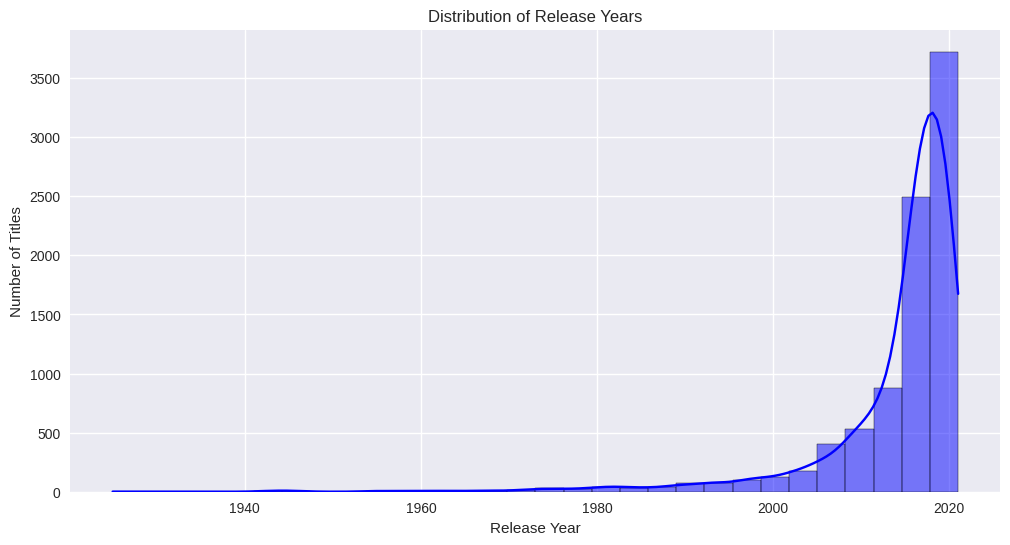

In [ ]:
#Plotting distribution of release years
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


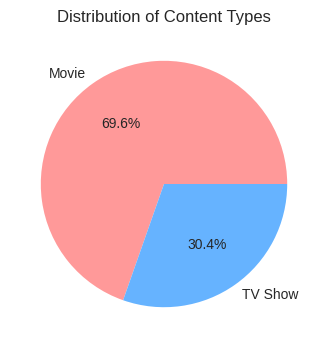

In [ ]:
#Plotting pie chart of content types
plt.figure(figsize=(4, 4))
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Content Types')
plt.show()

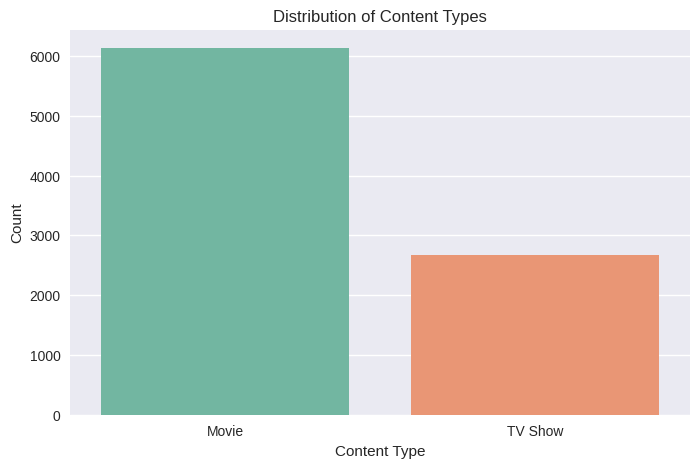

In [ ]:
#visualization of content types
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

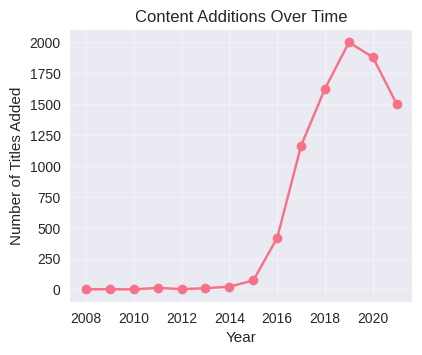

In [ ]:
#Content additions over time

plt.figure(figsize=(15, 12))

ax8 = plt.subplot(3, 3, 8)
df['date_added_temp'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added_temp'] = df['date_added_temp'].dt.year
yearly_additions = df['year_added_temp'].value_counts().sort_index()
plt.plot(yearly_additions.index, yearly_additions.values, marker='o')
plt.title('Content Additions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True, alpha=0.3)

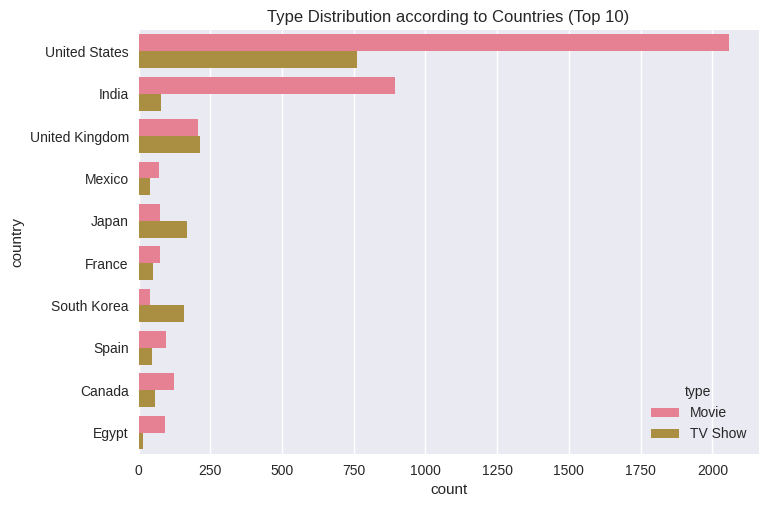

In [ ]:
# Type distribution according to Countries
top_10_countries = df['country'].value_counts().head(10).index
df_top_countries = df[df['country'].isin(top_10_countries)]

plt.figure()
sns.countplot(data=df_top_countries, y='country', hue='type')
plt.title('Type Distribution according to Countries (Top 10)')
plt.show()

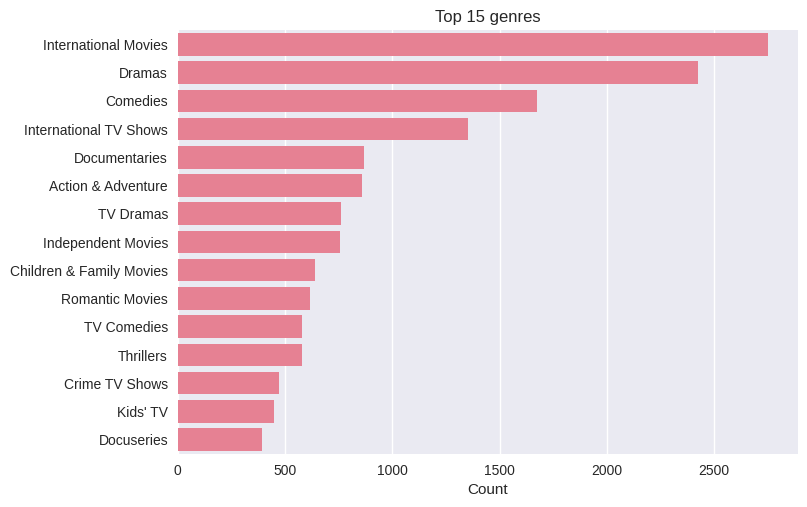

In [ ]:
# Top genre
all_genres = []
for genres in df['listed_in'].dropna():
    genre_list = [genre.strip() for genre in genres.split(',')]
    all_genres.extend(genre_list)

genre_counts = Counter(all_genres)
top_genres = dict(genre_counts.most_common(15))

plt.figure()
sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()))
plt.title('Top 15 genres')
plt.xlabel('Count')
plt.show()


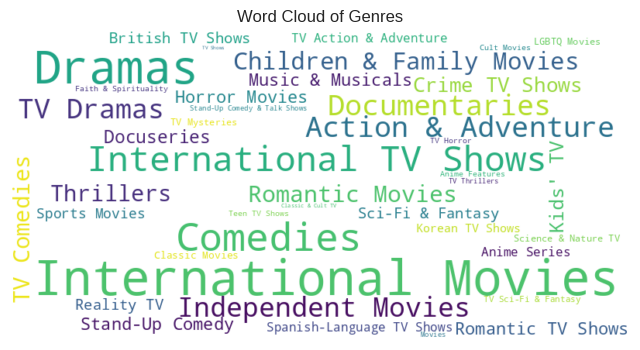

In [ ]:
# Word cloud Genres
plt.figure()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Genres')
plt.show()

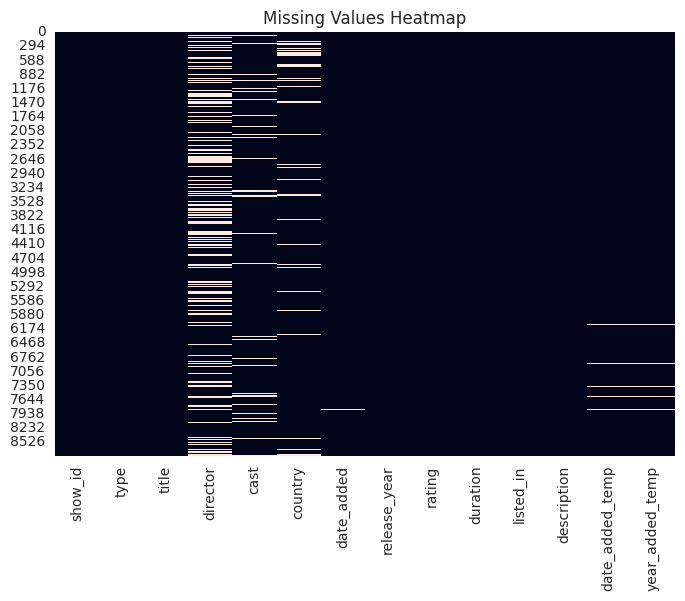

In [ ]:
# Plotting missing data heatmap
sns.set_style("white")
sns.set_palette('colorblind')

sns.heatmap(df.isna(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
def analyze_categorical_features(df, categorical_cols):

    """Analyze categorical features in the dataset"""

    for col in categorical_cols:
        print(f"\n--- {col} ---")
        print(f"Unique values: {df[col].nunique()}")
        print("Value counts:")
        print(df[col].value_counts())
        print("\n")
        print("-" * 30)

categorical_cols = ['type', 'rating']
analyze_categorical_features(df, categorical_cols)


--- type ---
Unique values: 2
Value counts:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


------------------------------

--- rating ---
Unique values: 17
Value counts:
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


------------------------------


## Data Cleaning and Preprocessing

In [ ]:
df_clean = df.copy()

### 1. Handling Missing Data

In [ ]:
df_clean['director'] = df_clean['director'].fillna('Unknown')
df_clean['cast'] = df_clean['cast'].fillna('Unknown')
df_clean['country'] = df_clean['country'].fillna('Unknown')
df_clean['rating'] = df_clean['rating'].fillna('Not Rated')

In [ ]:
def parse_duration(duration):
  if 'min' in str(duration):
      return int(str(duration).split(' ')[0])
  elif 'Season' in str(duration):
      return int(str(duration).split(' ')[0]) * 8 * 40  # Scale seasons differently
  else:
      return 0

# Apply parsing
df_clean['duration_in_min'] = df_clean['duration'].apply(parse_duration)

movie_median = df_clean.loc[df_clean['type'] == 'Movie', 'duration_in_min'].median()
tv_median = df_clean.loc[df_clean['type'] == 'TV Show', 'duration_in_min'].median()

df_clean.loc[(df_clean['type'] == 'Movie') & (df_clean['duration_in_min'].isna()), 'duration_in_min'] = movie_median
df_clean.loc[(df_clean['type'] == 'TV Show') & (df_clean['duration_in_min'].isna()), 'duration_in_min'] = tv_median

In [ ]:
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'], errors='coerce')
median_date = df_clean['date_added'].dropna().median()
df_clean['date_added'] = df_clean['date_added'].fillna(median_date)

### 2. Convert 'date_added' to datetime

In [ ]:
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'], format='mixed')

# Create temporal features
df_clean['year_added'] = df_clean['date_added'].dt.year
df_clean['month_added'] = df_clean['date_added'].dt.month
df_clean['day_added'] = df_clean['date_added'].dt.day
df_clean['day_of_week_added'] = df_clean['date_added'].dt.dayofweek # Monday=0, Sunday=6
df_clean['quarter_added'] = df_clean['date_added'].dt.quarter   # 1=Jan-Mar, 2=Apr-Jun, 3=Jul-Sep, 4=Oct-Dec

df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_temp,year_added_temp,duration_in_min,year_added,month_added,day_added,day_of_week_added,quarter_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0,90,2021,9,25,5,3
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0,640,2021,9,24,4,3
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021.0,320,2021,9,24,4,3
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,2021.0,320,2021,9,24,4,3
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,2021.0,640,2021,9,24,4,3


In [ ]:
df_clean.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,3


## clustering_features:
> is_movie

> is_tv_show

> duration_numeric

> genre_vector  # One-hot encoded main genres

> rating_encoded

In [ ]:
df_eng = df_clean.copy()

# Extract features from duration
df_eng['is_movie'] = df_eng['type'].apply(lambda x: 1 if x == 'Movie' else 0)
df_eng['is_tv_show'] = df_eng['type'].apply(lambda x: 1 if x == 'TV Show' else 0)

# Extract duration in numerical format
# def extract_duration(duration):
#     if 'min' in str(duration):
#         return int(str(duration).split(' ')[0])
#     elif 'Season' in str(duration):
#         return int(str(duration).split(' ')[0]) * 100  # Scale seasons differently
#     else:
#         return 0

# df_eng['duration_numeric'] = df_eng['duration'].apply(extract_duration)

In [ ]:
df_eng.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,3


In [ ]:
# Genre Vector (One-hot econded main genres)
def get_main_genres(genre_string):
  if pd.isna(genre_string):
    return []
  # Split genre and removed unused blank ' '
  genres = [genre.strip() for genre in str(genre_string).split(',')]
  return genres

# Collect all genres
all_genres = []
for genre_list in df_eng['listed_in'].apply(get_main_genres):
  all_genres.extend(genre_list)

# Collect top 15 most popular genres to avoid too many dimensions
top_genres = [genre for genre, count in Counter(all_genres).most_common(15)]  # Top 15 genres (can adjusted)

# Create one-hot enconding for genres
for genre in top_genres:
  df_eng[f'genre_{genre}'] = df_eng['listed_in'].apply(lambda x: 1 if genre in str(x) else 0)

In [ ]:
## Encoding Rating Feature

print(f"Unique ratings: {df_eng['rating'].nunique()}")
print("\nRating value counts:")
rating_counts = df_eng['rating'].value_counts()
print(rating_counts)

print(f"\nMissing values: {df_eng['rating'].isnull().sum()}")

Unique ratings: 18

Rating value counts:
rating
TV-MA        3207
TV-14        2160
TV-PG         863
R             799
PG-13         490
TV-Y7         334
TV-Y          307
PG            287
TV-G          220
NR             80
G              41
TV-Y7-FV        6
Not Rated       4
NC-17           3
UR              3
66 min          1
74 min          1
84 min          1
Name: count, dtype: int64

Missing values: 0


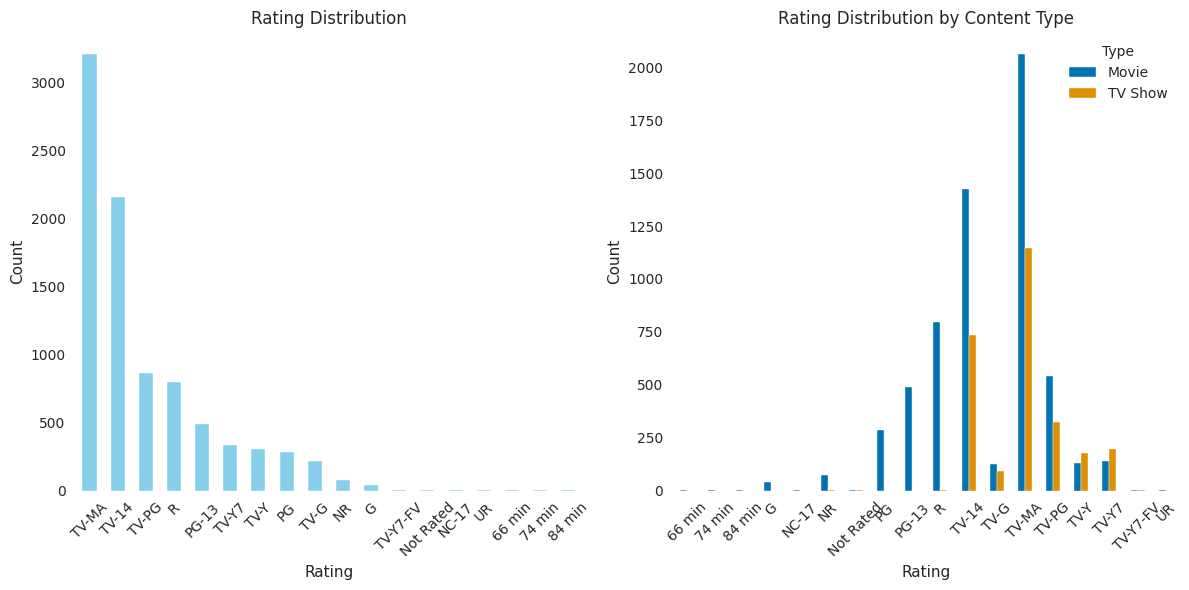

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
# Separate by content type
rating_by_type = pd.crosstab(df_eng['rating'], df_eng['type'])
rating_by_type.plot(kind='bar', ax=plt.gca())
plt.title('Rating Distribution by Content Type')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Movies:

| Rating    | Description                                                                           |
| :-------- | :------------------------------------------------------------------------------------ |
| **G**     | General Audiences — All ages admitted                                                 |
| **PG**    | Parental Guidance Suggested — Some material may not be suitable for children          |
| **PG-13** | Parents Strongly Cautioned — Some material may be inappropriate for children under 13 |
| **R**     | Restricted — Under 17 requires accompanying parent or adult guardian                  |
| **NC-17** | Adults Only — No one 17 and under admitted                                            |

TV Shows:
| Rating    | Description                                                          |
| :-------- | :------------------------------------------------------------------- |
| **TV-Y**  | Appropriate for all children                                         |
| **TV-Y7** | For children age 7 and older                                         |
| **TV-G**  | Suitable for all ages                                                |
| **TV-PG** | Parental guidance suggested                                          |
| **TV-14** | Parents strongly cautioned — may be unsuitable for children under 14 |
| **TV-MA** | Mature audiences only — may be unsuitable for children under 17      |



In [ ]:
# Strategy 1: Simple maturity score (0-5 scale)
def encode_maturity_score(rating):
    """Encode ratings on a maturity scale from 0 (kid-friendly) to 5 (adult-only)"""
    maturity_mapping = {
        # Kids & Family
        'TV-Y': 0, 'TV-Y7': 1, 'G': 1, 'TV-G': 1,
        # General audience with guidance
        'PG': 2, 'TV-PG': 2,
        # Teen guidance
        'PG-13': 3, 'TV-14': 3,
        # Mature audiences
        'R': 4, 'TV-MA': 4,
        # Adults only
        'NC-17': 5
    }
    return maturity_mapping.get(rating, 2.5)  # Default to medium if unknown

In [ ]:
# Strategy 2: Audience type categories
def encode_audience_type(rating):
    """Encode ratings into audience categories"""
    audience_mapping = {
        'TV-Y': 'Kids', 'TV-Y7': 'Older Kids', 'G': 'Family', 'TV-G': 'Family',
        'PG': 'Family Guidance', 'TV-PG': 'Family Guidance',
        'PG-13': 'Teen', 'TV-14': 'Teen',
        'R': 'Adult', 'TV-MA': 'Adult', 'NC-17': 'Adult Only'
    }
    return audience_mapping.get(rating, 'General')

In [ ]:
# Strategy 3: Binary encoding for specific use cases
def encode_binary_adult(rating):
    """Binary encoding for adult vs non-adult content"""
    adult_ratings = ['R', 'TV-MA', 'NC-17']
    return 1 if rating in adult_ratings else 0

In [ ]:
# Apply encodings
df_eng['rating_maturity_score'] = df_eng['rating'].apply(encode_maturity_score)
df_eng['rating_audience_type'] = df_eng['rating'].apply(encode_audience_type)
df_eng['rating_is_adult'] = df_eng['rating'].apply(encode_binary_adult)

print("=== ENCODING RESULTS ===")
print(df_eng[['rating', 'rating_maturity_score', 'rating_audience_type', 'rating_is_adult']].head(10))

=== ENCODING RESULTS ===
  rating  rating_maturity_score rating_audience_type  rating_is_adult
0  PG-13                    3.0                 Teen                0
1  TV-MA                    4.0                Adult                1
2  TV-MA                    4.0                Adult                1
3  TV-MA                    4.0                Adult                1
4  TV-MA                    4.0                Adult                1
5  TV-MA                    4.0                Adult                1
6     PG                    2.0      Family Guidance                0
7  TV-MA                    4.0                Adult                1
8  TV-14                    3.0                 Teen                0
9  PG-13                    3.0                 Teen                0


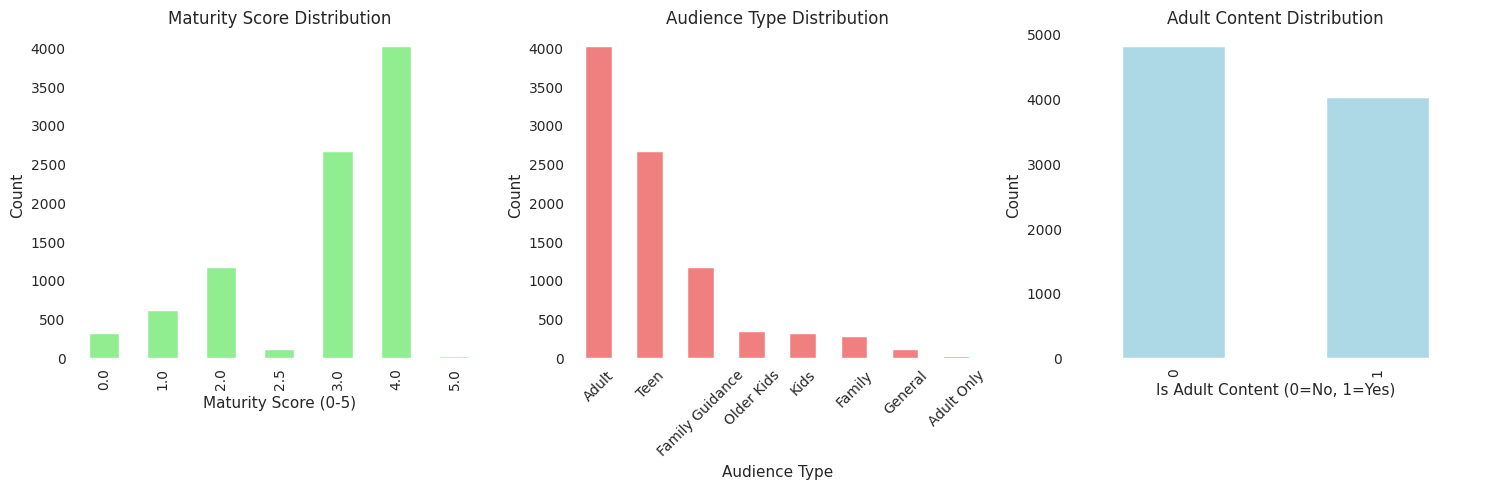


Cross-tabulation of original ratings with encodings:
           rating_maturity_score rating_audience_type  rating_is_adult  count
rating                                                                       
66 min                       2.5              General                0      1
74 min                       2.5              General                0      1
84 min                       2.5              General                0      1
G                            1.0               Family                0     41
NC-17                        5.0           Adult Only                1      3
NR                           2.5              General                0     80
Not Rated                    2.5              General                0      4
PG                           2.0      Family Guidance                0    287
PG-13                        3.0                 Teen                0    490
R                            4.0                Adult                1    799
TV-14     

In [ ]:
# Maturity score distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df_eng['rating_maturity_score'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Maturity Score Distribution')
plt.xlabel('Maturity Score (0-5)')
plt.ylabel('Count')

# Audience type distribution
plt.subplot(1, 3, 2)
df_eng['rating_audience_type'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Audience Type Distribution')
plt.xlabel('Audience Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adult content distribution
plt.subplot(1, 3, 3)
df_eng['rating_is_adult'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Adult Content Distribution')
plt.xlabel('Is Adult Content (0=No, 1=Yes)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Cross-tabulation with original ratings
print("\nCross-tabulation of original ratings with encodings:")
encoding_comparison = df_eng.groupby('rating').agg({
    'rating_maturity_score': 'first',
    'rating_audience_type': 'first',
    'rating_is_adult': 'first',
    'title': 'count'
}).rename(columns={'title': 'count'})
print(encoding_comparison)

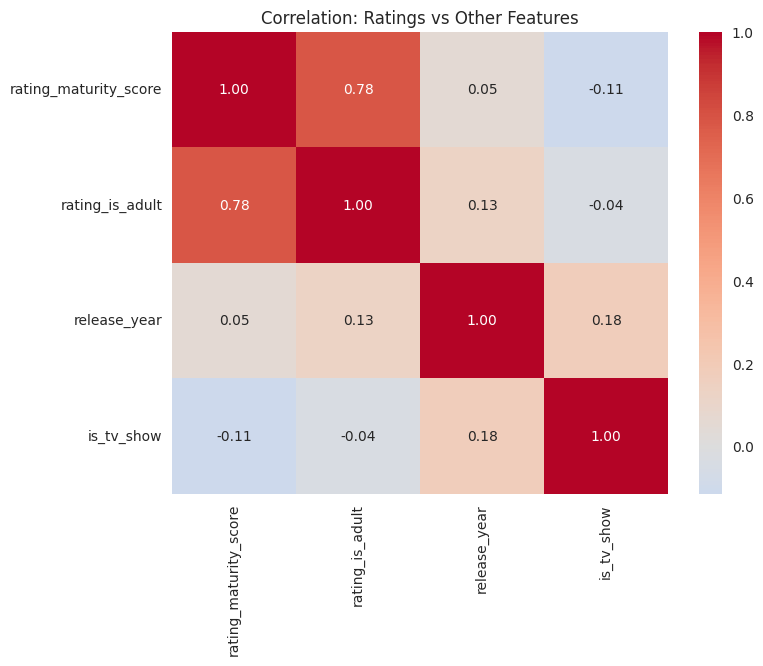


Rating distribution by content type:
type                  Movie  TV Show
rating_audience_type                
Adult                  71.4     28.6
Adult Only            100.0      0.0
Family                 64.0     36.0
Family Guidance        71.9     28.1
General                91.7      8.3
Kids                   42.7     57.3
Older Kids             41.6     58.4
Teen                   72.3     27.7


In [ ]:
# Correlation with other features (if numerical)
numerical_features = ['release_year', 'is_tv_show' ]
correlation_data = df_eng[['rating_maturity_score', 'rating_is_adult'] + numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation: Ratings vs Other Features')
plt.show()

# Rating distribution by content type
print("\nRating distribution by content type:")
rating_type_analysis = pd.crosstab(df_eng['rating_audience_type'], df_eng['type'], normalize='index') * 100
print(rating_type_analysis.round(1))

**Dimensionality reduction**

In [ ]:
df_eng.shape

(8807, 40)

In [ ]:
df_eng.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,3


In [ ]:
df_eng = df_eng.drop('date_added_temp', axis=1)
df_eng = df_eng.drop('year_added_temp', axis=1)

In [ ]:
# Select only numerical columns for PCA
numerical_cols = df_eng.select_dtypes(include=np.number).columns
df_numerical = df_eng[numerical_cols]

pca = PCA(n_components=10, random_state=123)
df_pca = pca.fit_transform(df_numerical)

In [ ]:
print("Original shape:", df_numerical.shape)
print("Reduced shape:", df_pca.shape)

Original shape: (8807, 26)
Reduced shape: (8807, 10)


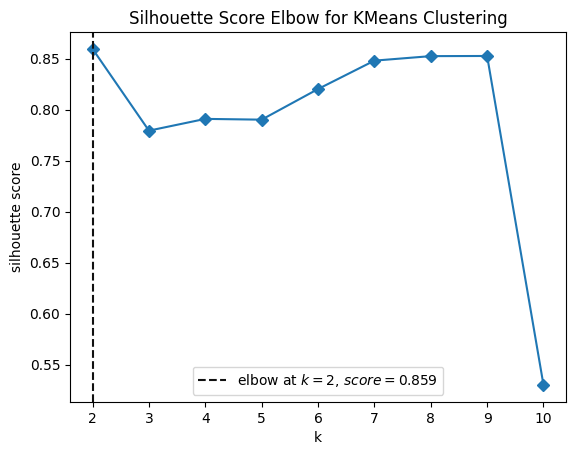

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, k=10, metric='silhouette', timings=False, locate_elbow=True)
visualizer.fit(df_pca)
visualizer.show()

## **Clustering**

In [ ]:
# Perform K-means clustering with the optimal k
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=123)
df_eng['cluster'] = kmeans.fit_predict(df_pca)

print(df_eng['cluster'].value_counts())

cluster
0    8349
1     458
Name: count, dtype: int64


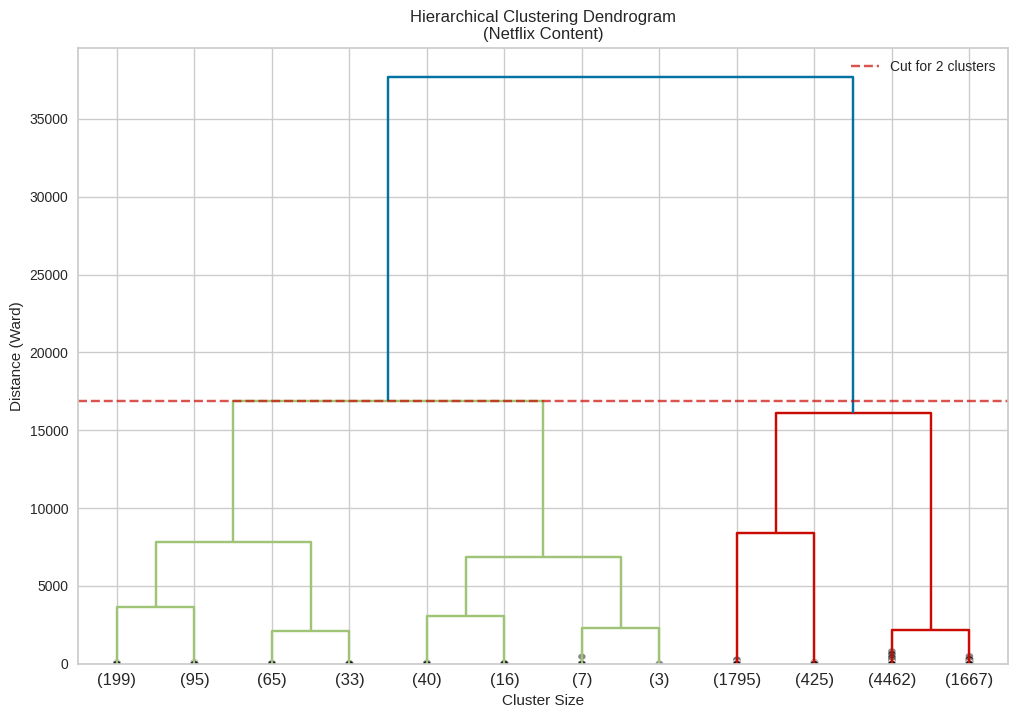

COMPARISON: K-MEANS vs HIERARCHICAL CLUSTERING
K-means cluster distribution:
cluster
0    8349
1     458
Name: count, dtype: int64

Hierarchical clustering distribution:
cluster_hierarchical
0    8349
1     458
Name: count, dtype: int64


In [ ]:
# Prepare data for hierarchical clustering
X = df_pca

# Perform hierarchical clustering
Z = linkage(X, method='ward', metric='euclidean')

# Create dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z,
           orientation='top',
           labels=df_eng.index.values,
           distance_sort='descending',
           show_leaf_counts=True,
           truncate_mode='lastp',  # Show only the last p merged clusters
           p=12,  # Show last 12 merges
           show_contracted=True)  # Show contracted branches

plt.title('Hierarchical Clustering Dendrogram\n(Netflix Content)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance (Ward)')
plt.axhline(y=Z[-optimal_k, 2], color='r', linestyle='--', alpha=0.7, label=f'Cut for {optimal_k} clusters')
plt.legend()
plt.show()

# Compare with K-means results
print("COMPARISON: K-MEANS vs HIERARCHICAL CLUSTERING")

# Get hierarchical clusters at 2-cluster level
hierarchical_clusters = fcluster(Z, t=optimal_k, criterion='maxclust')
df_eng['cluster_hierarchical'] = hierarchical_clusters - 1  # Convert to 0-indexed

# Compare cluster distributions
print("K-means cluster distribution:")
print(df_eng['cluster'].value_counts().sort_index())
print("\nHierarchical clustering distribution:")
print(df_eng['cluster_hierarchical'].value_counts().sort_index())

In [ ]:
# Analyze cluster
df_cluster = df_eng.copy()
cluster_analysis = df_cluster.groupby('cluster').agg({
    'rating_maturity_score': 'mean',
    'rating_is_adult': 'mean',
    'release_year': ['min', 'max'],
    'duration_in_min' : 'mean',
    'type' : lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown'
}).round(3)

display(cluster_analysis)

rating_maturity_score rating_is_adult release_year        \
                         mean            mean          min   max   
cluster                                                            
0                       3.096           0.458         1925  2021   
1                       2.786           0.397         1963  2021   

        duration_in_min     type  
                   mean <lambda>  
cluster                           
0               174.388    Movie  
1              1453.275  TV Show

In [ ]:
# Distribution of audience types
audience_by_cluster = pd.crosstab(df_cluster['cluster'], df_cluster['rating_audience_type'], normalize='index') * 100

display(audience_by_cluster.round(2))

rating_audience_type,Adult,Adult Only,Family,Family Guidance,General,Kids,Older Kids,Teen
cluster,,,,,,,,
0,45.80,0.04,2.86,13.19,1.13,3.29,3.46,30.23
1,39.74,0.00,4.80,10.70,0.44,6.99,9.83,27.51


In [ ]:
# Interpretation
def interpret_cluster_detailed(cluster_id, cluster_data):
    """Detailed interpretation for each cluster"""
    maturity_mean = cluster_data[('rating_maturity_score', 'mean')]
    adult_mean = cluster_data[('rating_is_adult', 'mean')]
    year_min = cluster_data[('release_year', 'min')]
    year_max = cluster_data[('release_year', 'max')]

    interpretation = []

    # Maturity interpretation
    if maturity_mean >= 3.0:
        interpretation.append("Mature Audience")
    elif maturity_mean <= 2.5:
        interpretation.append("Family Friendly")
    else:
        interpretation.append("General Audience")

    # Adult content interpretation
    if adult_mean >= 0.4:
        interpretation.append("Higher Adult Content")
    elif adult_mean <= 0.3:
        interpretation.append("Lower Adult Content")

    # Release year range interpretation
    year_range = year_max - year_min
    if year_min < 1980:
        interpretation.append("Includes Classics")
    if year_range > 50:
        interpretation.append("Wide Year Range")
    else:
        interpretation.append("Modern Focus")

    return " | ".join(interpretation)

# Apply interpretations
cluster_interpretations = {}
for cluster_id in cluster_analysis.index:
    cluster_data = cluster_analysis.loc[cluster_id]
    interpretation = interpret_cluster_detailed(cluster_id, cluster_data)
    cluster_interpretations[cluster_id] = interpretation

for cluster_id, interpretation in cluster_interpretations.items():
    print(f"Cluster {cluster_id}: {interpretation}")

Cluster 0: Mature Audience | Higher Adult Content | Includes Classics | Wide Year Range
Cluster 1: General Audience | Includes Classics | Wide Year Range


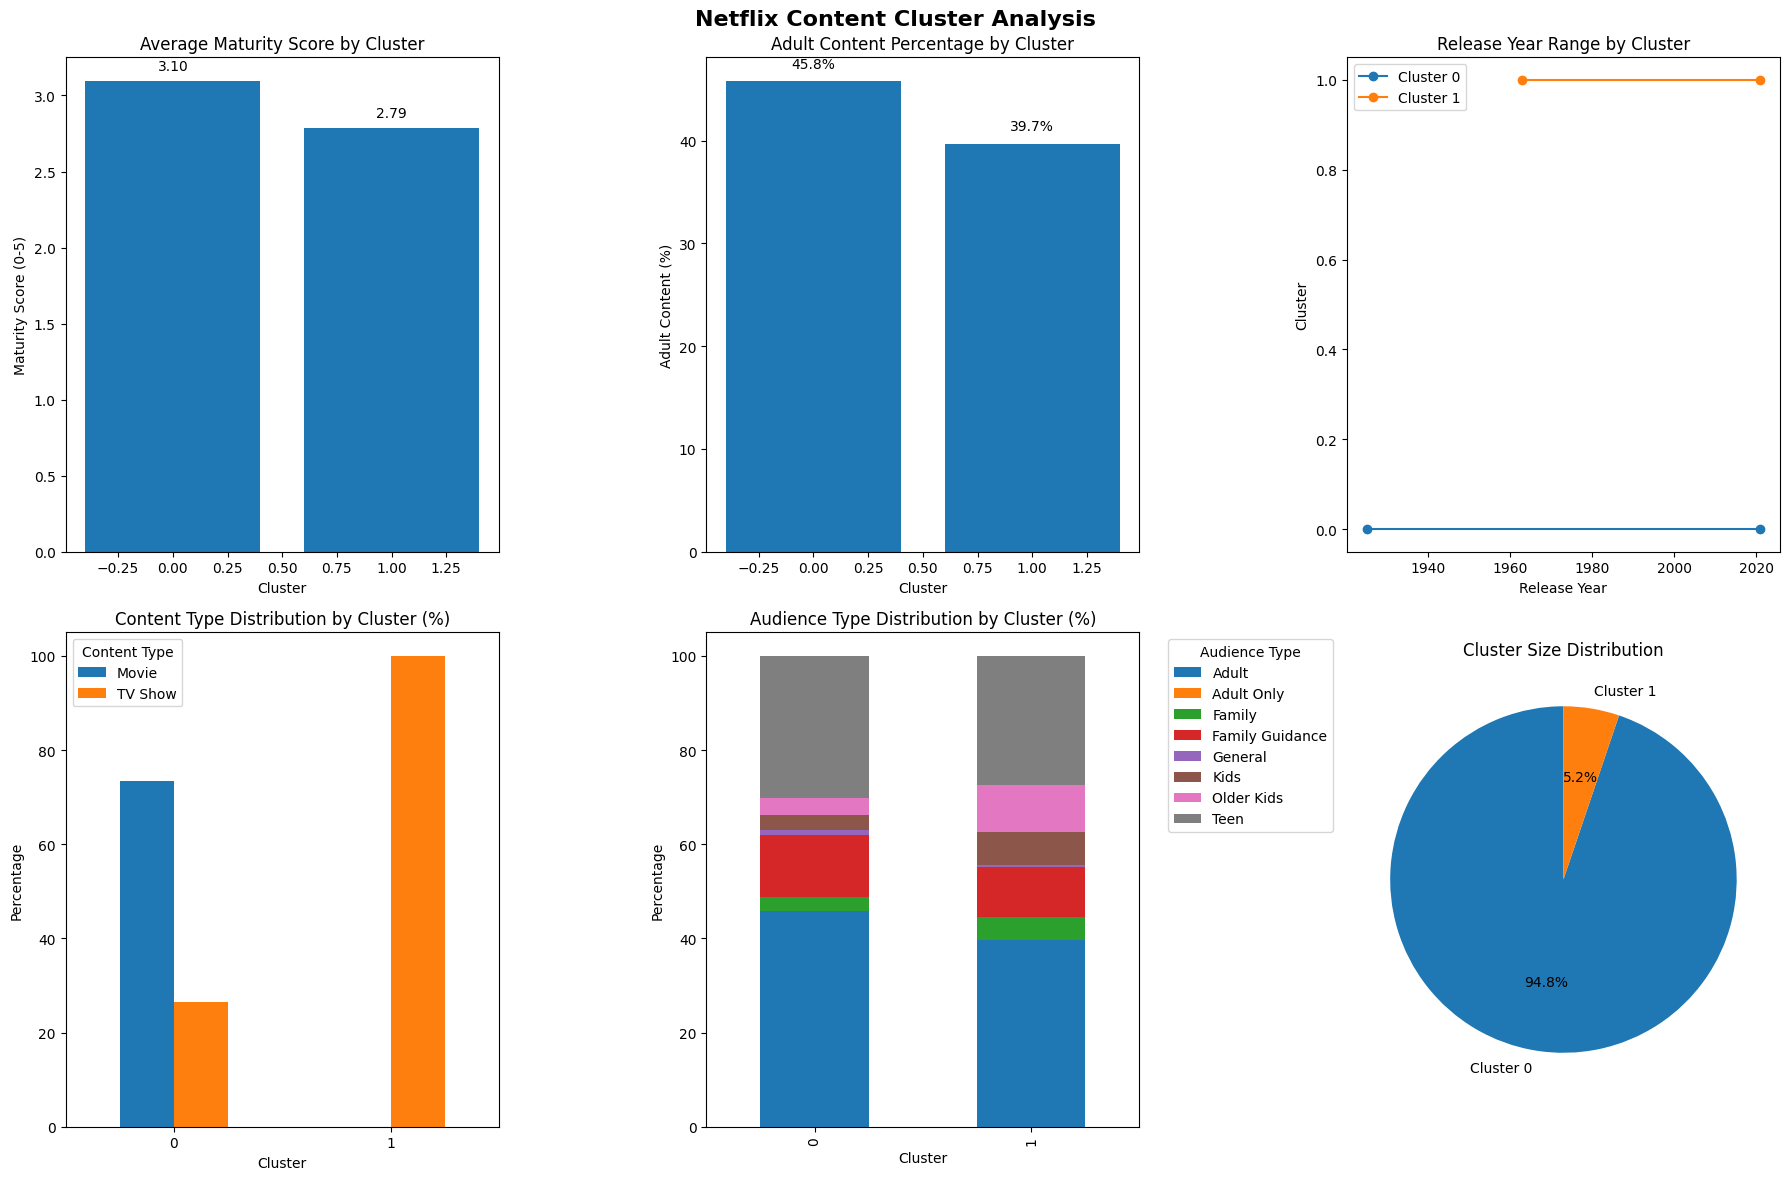

In [ ]:
#Visulization for Interpretation

# Set style
plt.style.use('default')

# Create visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Netflix Content Cluster Analysis', fontsize=16, fontweight='bold')

# 1. Maturity Score by Cluster
maturity_data = [cluster_analysis[('rating_maturity_score', 'mean')].values]
axes[0,0].bar(range(optimal_k), maturity_data[0])
axes[0,0].set_title('Average Maturity Score by Cluster')
axes[0,0].set_xlabel('Cluster')
axes[0,0].set_ylabel('Maturity Score (0-5)')
for i, v in enumerate(maturity_data[0]):
    axes[0,0].text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')

# 2. Adult Content Percentage
adult_data = [cluster_analysis[('rating_is_adult', 'mean')].values * 100]
axes[0,1].bar(range(optimal_k), adult_data[0])
axes[0,1].set_title('Adult Content Percentage by Cluster')
axes[0,1].set_xlabel('Cluster')
axes[0,1].set_ylabel('Adult Content (%)')
for i, v in enumerate(adult_data[0]):
    axes[0,1].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

# 3. Release Year Range
year_min = cluster_analysis[('release_year', 'min')].values
year_max = cluster_analysis[('release_year', 'max')].values
for i in range(optimal_k):
    axes[0,2].plot([year_min[i], year_max[i]], [i, i], 'o-',
                  label=f'Cluster {i}')
axes[0,2].set_title('Release Year Range by Cluster')
axes[0,2].set_xlabel('Release Year')
axes[0,2].set_ylabel('Cluster')
axes[0,2].legend()

# 4. Content Type Distribution by Cluster
content_by_cluster = pd.crosstab(df_eng['cluster'], df_eng['type'], normalize='index') * 100
content_by_cluster.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Content Type Distribution by Cluster (%)')
axes[1,0].set_xlabel('Cluster')
axes[1,0].set_ylabel('Percentage')
axes[1,0].legend(title='Content Type')
axes[1,0].tick_params(axis='x', rotation=0)

# 5. Audience Type Distribution
audience_by_cluster = pd.crosstab(df_eng['cluster'], df_eng['rating_audience_type'], normalize='index') * 100
audience_by_cluster.plot(kind='bar', ax=axes[1,1], stacked=True)
axes[1,1].set_title('Audience Type Distribution by Cluster (%)')
axes[1,1].set_xlabel('Cluster')
axes[1,1].set_ylabel('Percentage')
axes[1,1].legend(title='Audience Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# 6. Cluster Size Distribution
cluster_sizes = df_eng['cluster'].value_counts().sort_index()
axes[1,2].pie(cluster_sizes, labels=[f'Cluster {i}' for i in cluster_sizes.index],
              autopct='%1.1f%%', startangle=90)
axes[1,2].set_title('Cluster Size Distribution')

plt.tight_layout()
plt.show()